# <center> ANÁLISIS DE DATOS DE _METABARCODING_: [QIIME2](https://docs.qiime2.org/2024.5/)</center>

# QIIME2: <https://docs.qiime2.org/2024.5/>

<div class="alert alert-block alert-warning"> 
<p><b>Elaborado por:</b> QUIÉL ELABORÓ ESTA BITÁCORA<br />
<b>Departamento:</b> Innovacción Biomédica<br />
<b>Institución:</b> CICESE<br /> </p>
</div>


In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://docs.qiime2.org/2024.5/_images/overview.png", width=900, height=900)

# <span style="color:blue">Protocólo básico de análisis de datos de metabarcoding con QIIME2</span>

Para poder llevar a cabo el siguiente protocolo, necesitamos, en primera instancia contar con lo siguiente:


1. Directorio general de trabajo: `/Users/mario/Desktop/metabaR/qiime2`
2. Directorios para archivos de entrada y salida (?)
3. Datos crudos (secuencias de ADN) de un projecto de metabarcoding.
4. Metadatos asociados a las secuencias de ADN a emplear (metadata).
5. Tener instalado QIIME2 (obligatorio)
6. Leer y entender el flujo de análisis de QIIME2.
7. Manejar y conocer bien mis datos.

In [1]:
%%bash

qiime --help

Usage: qiime [OPTIONS] COMMAND [ARGS]...

  QIIME 2 command-line interface (q2cli)
  --------------------------------------

  To get help with QIIME 2, visit https://qiime2.org.

  To enable tab completion in Bash, run the following command or add it to
  your .bashrc/.bash_profile:

      source tab-qiime

  To enable tab completion in ZSH, run the following commands or add them to
  your .zshrc:

      autoload -Uz compinit && compinit
      autoload bashcompinit && bashcompinit
      source tab-qiime

Options:
  --version   Show the version and exit.
  --help      Show this message and exit.

Commands:
  info                Display information about current deployment.
  tools               Tools for working with QIIME 2 files.
  dev                 Utilities for developers and advanced users.
  alignment           Plugin for generating and manipulating alignments.
  composition         Plugin for compositional data analysis.
  cutadapt            Plugin for removing adapter sequen

# 1. Clonamos el repositorio: Obteniendo datos NGS

Para poder empezar a trabajar, necesitamos entrar a nuestro directorio de trabajo y organizarlo para que tengamos nuestros archivos de trabajo:

 1. Secuencias de ADN (raw sequences): *.fastq.gz. 
 2. Metadatos asociados a mi experimento: *.txt; *.tsv; *.csv; *.tsv
 
 
 ## Repositorio: https://github.com/MaryoHg/datasets


In [3]:
%%bash

pwd                                                          # saber dónde estoy
git clone https://github.com/MaryoHg/datasets                # Clonamos el repositorio
ls -l                                                        # saber que se clonó exitosamente

/Users/mario/Desktop/metabaR/qiime2


Cloning into 'datasets'...


In [9]:
%%bash

ls -l                                                        # saber qué se clonó exitosamente

total 224
drwxr-xr-x  9 mario  staff     288 Oct 14 06:09 datasets
drwxr-xr-x  4 mario  staff     128 Oct 13 19:50 figures
-rw-r--r--  1 mario  staff  111264 Oct 14 06:12 qiime2-protocol-analyses.ipynb


## 1.1. Hago los movimientos necesarios para organizar mi directorio


1. Descomprimir mis secuencias demultiplex a un directorio conocido: `Desktop/metabar/raw_seqs/`
2. Mueva los metadatos a su directorio de trabajo: `/Desktop/metabar/qiime2/.`.
3. Elimine el resto de archivos del directorio que clonó del repositorio de GitHub: opcional!
4. Crear un directorio de salida: _out_dir/_: `mkdir out_dir`


### Así, en nuestro directorio de trabajo, sólo tendremos lo siguiente:

- Nuestra bitácora  
- Carpeta que contendrá mis secuencias  
- Mis metadatos asociados a mis secuencias  
- Directorio de salida
- Directorio para imágenes

Con el siguiente comando, ejecutaré las siguientes órdenes:
    
    1. Descomprimir el archivo `datasets/raw_seqs.tar.gz` a mi directorio actua `qiime2/`
    2. Mover los metadatos a mi directorio de trabajo
    3. Eliminar el directorio clonado y verificar que todo esté limpio: opcional.

In [15]:
!pwd
!echo
!ls -l datasets/                                              # saber qué tiene nuestro nuevo directorio

/Users/mario/Desktop/metabaR/qiime2

total 75552
-rwxr-xr-x  1 mario  staff    470844 Oct 14 06:09 2018-Hall-and-Beiko_16SrRNA_gene_analysis_QIIME2.pdf
-rw-r--r--  1 mario  staff     26526 Oct 14 06:09 LICENSE
-rw-r--r--  1 mario  staff       289 Oct 14 06:09 README.md
-rw-r--r--  1 mario  staff  38172111 Oct 14 06:09 raw_seqs.tar.gz
-rw-r--r--  1 mario  staff      2117 Oct 14 06:09 sample-metadata.tsv


In [13]:
%%bash

time tar -xvzf datasets/raw_seqs.tar.gz -C ./        # ?
cp datasets/sample-metadata.tsv ./                   # ?

x raw_seqs/
x raw_seqs/DNA10_14_L001_R2_001.fastq.gz
x raw_seqs/DNA16_18_L001_R2_001.fastq.gz
x raw_seqs/DNA01_6_L001_R1_001.fastq.gz
x raw_seqs/DNA03_8_L001_R1_001.fastq.gz
x raw_seqs/DNA08_17_L001_R1_001.fastq.gz
x raw_seqs/DNA04_2_L001_R1_001.fastq.gz
x raw_seqs/DNA06_10_L001_R1_001.fastq.gz
x raw_seqs/DNA09_4_L001_R2_001.fastq.gz
x raw_seqs/DNA17_16_L001_R1_001.fastq.gz
x raw_seqs/DNA05_11_L001_R1_001.fastq.gz
x raw_seqs/DNA14_9_L001_R2_001.fastq.gz
x raw_seqs/DNA18_13_L001_R1_001.fastq.gz
x raw_seqs/DNA12_3_L001_R2_001.fastq.gz
x raw_seqs/DNA11_5_L001_R1_001.fastq.gz
x raw_seqs/DNA02_1_L001_R2_001.fastq.gz
x raw_seqs/DNA07_15_L001_R2_001.fastq.gz
x raw_seqs/DNA15_12_L001_R2_001.fastq.gz
x raw_seqs/DNA13_7_L001_R2_001.fastq.gz
x raw_seqs/DNA11_5_L001_R2_001.fastq.gz
x raw_seqs/DNA12_3_L001_R1_001.fastq.gz
x raw_seqs/DNA02_1_L001_R1_001.fastq.gz
x raw_seqs/DNA15_12_L001_R1_001.fastq.gz
x raw_seqs/DNA13_7_L001_R1_001.fastq.gz
x raw_seqs/DNA07_15_L001_R1_001.fastq.gz
x raw_seqs/DNA08_

In [16]:
%%bash

ls -l *

-rw-r--r--  1 mario  staff  115515 Oct 14 06:17 qiime2-protocol-analyses.ipynb
-rw-r--r--  1 mario  staff    2117 Oct 14 06:14 sample-metadata.tsv

datasets:
total 75552
-rwxr-xr-x  1 mario  staff    470844 Oct 14 06:09 2018-Hall-and-Beiko_16SrRNA_gene_analysis_QIIME2.pdf
-rw-r--r--  1 mario  staff     26526 Oct 14 06:09 LICENSE
-rw-r--r--  1 mario  staff       289 Oct 14 06:09 README.md
-rw-r--r--  1 mario  staff  38172111 Oct 14 06:09 raw_seqs.tar.gz
-rw-r--r--  1 mario  staff      2117 Oct 14 06:09 sample-metadata.tsv

figures:
total 3344
-rw-r--r--@ 1 mario  staff  923543 Oct 13 19:49 demux_phred.png
-rw-r--r--@ 1 mario  staff  786317 Oct 13 19:49 demux_summary.png

raw_seqs:
total 74664
-rw-r--r--  1 mario  staff  2142103 Oct 13 19:25 DNA01_6_L001_R1_001.fastq.gz
-rw-r--r--  1 mario  staff  2930701 Oct 13 19:25 DNA01_6_L001_R2_001.fastq.gz
-rw-r--r--  1 mario  staff  1770211 Oct 13 19:25 DNA02_1_L001_R1_001.fastq.gz
-rw-r--r--  1 mario  staff  2379486 Oct 13 19:25 DNA02_1_L001_R2_

In [17]:
!ls -l

total 240
drwxr-xr-x   9 mario  staff     288 Oct 14 06:09 datasets
drwxr-xr-x   4 mario  staff     128 Oct 13 19:50 figures
-rw-r--r--   1 mario  staff  115515 Oct 14 06:17 qiime2-protocol-analyses.ipynb
drwxr-xr-x  38 mario  staff    1216 Oct 13 23:30 raw_seqs
-rw-r--r--   1 mario  staff    2117 Oct 14 06:14 sample-metadata.tsv


# 2. `FastQC`: Quality verifying tool


La visualización de la calidad `Phred` de mis muestras puedo realizar con la herramienta [`FastQC`](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/)

Esta herramienta fue desarrollada por [Brabaham Institute](https://www.bioinformatics.babraham.ac.uk), y puedes instalarlo con el comando siguiente:

`$ conda install bioconda::fastqc`

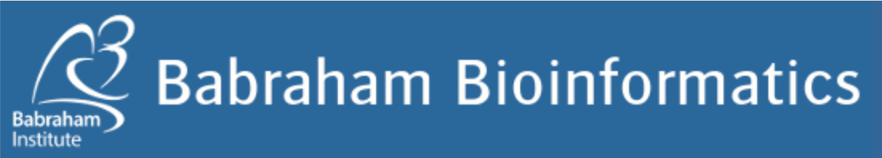

In [18]:
%%bash

pwd
mkdir -p out_dir/fastq_results
time fastqc raw_seqs/*.gz -o out_dir/fastq_results -t 4 1> /dev/null

/Users/mario/Desktop/metabaR/qiime2


In [19]:
!ls -l out_dir/fastq_results

ls: out_dir/fastq_results: No such file or directory


### Actividad 1: Abra un archivo html de fastqc en su explorador favorito.
### Actividad 2: Indique en esta sección qué significan los argumentos de `fastqc`

# 3. Importación de datos a QIIME2: `qiime tools import`

El siguiente paso importará nuestras secuencias crudas a un **ARTIFACT** de qiime2 (extensión _*.qza_).



**Tipo de librería**: [**Casava 1.8 paired-end demultiplexed fastq¶!**](https://docs.qiime2.org/2024.5/tutorials/importing/#casava-1-8-paired-end-demultiplexed-fastq)


- Nuestra librería es **PAREADA y DEMUTIPLEXADA**; es decir, tenemos un par de archivos <i>*.fastq.gz</i> por muestra.

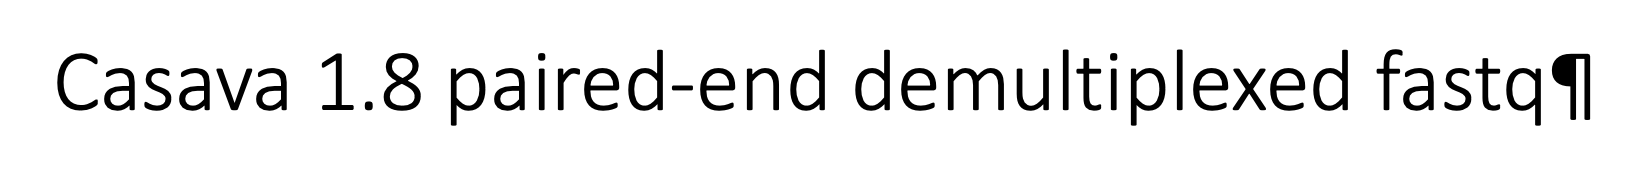

<div class="alert alert-block alert-info"> <b>NOTA IMPORTANTE:</b> Hay muchos tipos de "semántica" para poder importar diferentes tipos de librerías en QIIME2; debes aprender a entender tus datos y a identificar el método correcto de importación.</div>

In [ ]:
!qiime tools import --help # ver ayuda del comando

In [20]:
!ls -l

total 448
drwxr-xr-x   9 mario  staff     288 Oct 14 06:09 datasets
drwxr-xr-x   4 mario  staff     128 Oct 13 19:50 figures
drwxr-xr-x   3 mario  staff      96 Oct 14 06:36 out_dir
-rw-r--r--   1 mario  staff  224617 Oct 14 06:39 qiime2-protocol-analyses.ipynb
drwxr-xr-x  38 mario  staff    1216 Oct 13 23:30 raw_seqs
-rw-r--r--   1 mario  staff    2117 Oct 14 06:14 sample-metadata.tsv


In [21]:
%%bash

# run the command
time qiime tools import \
--type 'SampleData[PairedEndSequencesWithQuality]' \
--input-path raw_seqs/ \
--input-format CasavaOneEightSingleLanePerSampleDirFmt \
--output-path out_dir/demux.qza

# check if the output was build
ls -lh out_dir/

Imported raw_seqs/ as CasavaOneEightSingleLanePerSampleDirFmt to out_dir/demux.qza



real	0m19.089s
user	0m12.205s
sys	0m2.140s


total 74576
-rw-r--r--   1 mario  staff  38182663 Oct 14 06:41 demux.qza
drwxr-xr-x  74 mario  staff      2368 Oct 14 06:37 res_fastq


In [25]:
!ls -lh out_dir/

total 74576
-rw-r--r--   1 mario  staff    36M Oct 14 06:41 demux.qza
drwxr-xr-x  74 mario  staff   2.3K Oct 14 06:37 res_fastq


<div class="alert alert-block alert-success"><b>RESULTADO:</b>
<strong>Si el archivo <i>multiplexed-seqs.qza</i> sí fue creado, se asume que la importación ha sido exitosa</strong>
</div>

## Actividad: explique lo que realizó el comando, y sus argumentos:

Los argumentos del comando de importación `qiime tools import` son los siguientes:

 - `--type`: Indica el tipo de estudio o librería. Existen varios, y la información se puede obtener de <>.  
 - `--input`: Indica el directorio de entrada, que debe contener 3 archivos: `forward.fastq.gz`, `reverse.fastq.gz` y `barcodes.fastq.gz`.  
 - `--input-format`: ???
 - `--output-path`: Directorio y nombre del archivo de salida. En este caso, mi archivo de salida se llamó `multiplexed-seqs.qza`.


## 3.1. Visualización de los resultados del demultiplexing

## Pregunta: ¿Cuántas secuencias tenemos por muestra o SampleID?

Ahora, debemos conocer las estadísticas de mi proceso de _importación de secuencias demultiplexed_. Para ello, usaremos el archivo <b>demux.qza</b>. **LO CONVERTIREMOS DE QZA A QZV** con el siguiente comando:


### Página para visualizar archivos _qzv_: https://view.qiime2.org/



In [26]:
%%bash

# Where am I?
pwd


# Completa los archivos faltantes:
time qiime demux summarize --i-data out_dir/demux.qza --o-visualization out_dir/demux.qzv

/Users/mario/Desktop/metabaR/qiime2
Saved Visualization to: out_dir/demux.qzv
total 448
drwxr-xr-x   9 mario  staff   288B Oct 14 06:09 datasets
drwxr-xr-x   4 mario  staff   128B Oct 13 19:50 figures
drwxr-xr-x   5 mario  staff   160B Oct 14 06:47 out_dir
-rw-r--r--   1 mario  staff   219K Oct 14 06:47 qiime2-protocol-analyses.ipynb
drwxr-xr-x  38 mario  staff   1.2K Oct 13 23:30 raw_seqs
-rw-r--r--   1 mario  staff   2.1K Oct 14 06:14 sample-metadata.tsv


In [27]:
!ls -lh out_dir/

total 75208
-rw-r--r--   1 mario  staff    36M Oct 14 06:41 demux.qza
-rw-r--r--   1 mario  staff   315K Oct 14 06:47 demux.qzv
drwxr-xr-x  74 mario  staff   2.3K Oct 14 06:37 res_fastq


<div class="alert alert-block alert-info"> <b>¿Cómo visualizar mi QZV?:</b> Para visualizar tu nuevo archivo QZV, dirígite a la página web de QIIME2: www.qiime2view.com</div>

<img src="figures/demux_summary.png" style="height:500px">
<img src="figures/demux_phred.png" style="height:500px">

---

# 5. Eliminando _primers_ con `cutadapt`:  Paired-end mode

Un paso **muy importante** en el control de calidad de análisis de metabarcoding es el de asegurarse de eliminar secuencias no biológicas. En este escenario entran los _primers_ (iniciadores u oligonucléotidos) y cualquier otro artifacto.

En este caso, eliminaremos _primers_, que conocemos previamente.

### Primer FW: `CCTACGGGNGGCWGCAG`

### Primer RV: `GACTACHVGGGTATCTAATCC`


## 5.1. Vemos la ayuda del comando: `qiime cutadapt trim-paired --help`

In [35]:
! qiime cutadapt trim-paired --help

Usage: qiime cutadapt trim-paired [OPTIONS]

  Search demultiplexed paired-end sequences for adapters and remove them. The
  parameter descriptions in this method are adapted from the official cutadapt
  docs - please see those docs at https://cutadapt.readthedocs.io for complete
  details.

Inputs:
  --i-demultiplexed-sequences ARTIFACT 
    SampleData[PairedEndSequencesWithQuality]
                          The paired-end sequences to be trimmed.   [required]
Parameters:
  --p-cores NTHREADS      Number of CPU cores to use.             [default: 1]
  --p-adapter-f TEXT...   Sequence of an adapter ligated to the 3' end. The
    List[Str]             adapter and any subsequent bases are trimmed. If a
                          `$` is appended, the adapter is only found if it is
                          at the end of the read. Search in forward read. If
                          your sequence of interest is "framed" by a 5' and a
                          3' adapter, use this parameter 

## 5.2. Corremos el comando

### Actividad: describa los argumentos del comando

In [38]:
%%bash

# Where am I?
pwd


# Run the command
time time qiime cutadapt trim-paired \
--i-demultiplexed-sequences demux-seqs.qza \
--p-front-f CCTACGGGNGGCWGCAG \
--p-front-r GACTACHVGGGTATCTAATCC \
--p-error-rate 0.1 \
--p-cores 4 \
--o-trimmed-sequences out_dir/demux_trimmed.qza \
--p-match-read-wildcards \
--verbose

This is cutadapt 4.9 with Python 3.9.19
Command line parameters: --cores 4 --error-rate 0.1 --times 1 --overlap 3 --minimum-length 1 -q 0,0 --quality-base 33 -o /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA01_6_L001_R1_001.fastq.gz -p /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA01_6_L001_R2_001.fastq.gz --front CCTACGGGNGGCWGCAG -G GACTACHVGGGTATCTAATCC --match-read-wildcards /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/qiime2/mario/data/3b577956-9ba7-4145-b5e8-c82545ac7513/data/DNA01_6_L001_R1_001.fastq.gz /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/qiime2/mario/data/3b577956-9ba7-4145-b5e8-c82545ac7513/data/DNA01_6_L001_R2_001.fastq.gz
Processing paired-end reads on 4 cores ...
Finished in 0.720 s (33.866 µs/read; 1.77 M reads/minute).

=== Summary ===

Total read pairs processed:             21,250
  Read 1 with adapter:                  21,225 (99.9%)
  Re


Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-16 bp: 1

Overview of removed sequences
length	count	expect	max.err	error counts
16	45	0.0	1	2 43
17	7785	0.0	1	7639 146
18	44	0.0	1	6 38


=== Second read: Adapter 2 ===

Sequence: GACTACHVGGGTATCTAATCC; Type: regular 5'; Length: 21; Trimmed: 7878 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-21 bp: 2

Overview of removed sequences
length	count	expect	max.err	error counts
19	2	0.0	1	0 0 2
20	32	0.0	2	1 23 8
21	7785	0.0	2	7622 154 9
22	58	0.0	2	10 42 6
23	1	0.0	2	0 0 1
This is cutadapt 4.9 with Python 3.9.19
Command line parameters: --cores 4 --error-rate 0.1 --times 1 --overlap 3 --minimum-length 1 -q 0,0 --quality-base 33 -o /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA05_11_L001_R1_001.fastq.gz -p /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA05_11_L001_R2_001.fastq.gz --front CCTAC


Total basepairs processed:     2,945,667 bp
  Read 1:     1,474,867 bp
  Read 2:     1,470,800 bp
Quality-trimmed:                       0 bp (0.0%)
  Read 1:             0 bp
  Read 2:             0 bp
Total written (filtered):      2,754,382 bp (93.5%)
  Read 1:     1,389,294 bp
  Read 2:     1,365,088 bp

=== First read: Adapter 1 ===

Sequence: CCTACGGGNGGCWGCAG; Type: regular 5'; Length: 17; Trimmed: 5034 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-16 bp: 1

Overview of removed sequences
length	count	expect	max.err	error counts
16	20	0.0	1	2 18
17	4999	0.0	1	4921 78
18	15	0.0	1	3 12


=== Second read: Adapter 2 ===

Sequence: GACTACHVGGGTATCTAATCC; Type: regular 5'; Length: 21; Trimmed: 5035 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-21 bp: 2

Overview of removed sequences
length	count	expect	max.err	error counts
20	34	0.0	2	1 26 7
21	4990	0.0	2	4913 73 4
22	11	0.0	2	1 8 2
This is cutadapt 4.9 with Python 3.9.19
Command line par

Processing paired-end reads on 4 cores ...
Finished in 0.578 s (104.793 µs/read; 0.57 M reads/minute).

=== Summary ===

Total read pairs processed:              5,517
  Read 1 with adapter:                   5,505 (99.8%)
  Read 2 with adapter:                   5,514 (99.9%)

== Read fate breakdown ==
Pairs that were too short:                   0 (0.0%)
Pairs written (passing filters):         5,517 (100.0%)

Total basepairs processed:     3,226,657 bp
  Read 1:     1,615,366 bp
  Read 2:     1,611,291 bp
Quality-trimmed:                       0 bp (0.0%)
  Read 1:             0 bp
  Read 2:             0 bp
Total written (filtered):      3,017,236 bp (93.5%)
  Read 1:     1,521,747 bp
  Read 2:     1,495,489 bp

=== First read: Adapter 1 ===

Sequence: CCTACGGGNGGCWGCAG; Type: regular 5'; Length: 17; Trimmed: 5505 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-16 bp: 1

Overview of removed sequences
length	count	expect	max.err	error counts
16	38	0.0	1	4 34
17	5395	0

Processing paired-end reads on 4 cores ...
Finished in 0.468 s (662.711 µs/read; 0.09 M reads/minute).

=== Summary ===

Total read pairs processed:                706
  Read 1 with adapter:                     705 (99.9%)
  Read 2 with adapter:                     705 (99.9%)

== Read fate breakdown ==
Pairs that were too short:                   0 (0.0%)
Pairs written (passing filters):           706 (100.0%)

Total basepairs processed:       413,061 bp
  Read 1:       206,826 bp
  Read 2:       206,235 bp
Quality-trimmed:                       0 bp (0.0%)
  Read 1:             0 bp
  Read 2:             0 bp
Total written (filtered):        386,271 bp (93.5%)
  Read 1:       194,833 bp
  Read 2:       191,438 bp

=== First read: Adapter 1 ===

Sequence: CCTACGGGNGGCWGCAG; Type: regular 5'; Length: 17; Trimmed: 705 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-16 bp: 1

Overview of removed sequences
length	count	expect	max.err	error counts
16	6	0.0	1	2 4
17	685	0.0	1



Command: cutadapt --cores 4 --error-rate 0.1 --times 1 --overlap 3 --minimum-length 1 -q 0,0 --quality-base 33 -o /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA05_11_L001_R1_001.fastq.gz -p /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA05_11_L001_R2_001.fastq.gz --front CCTACGGGNGGCWGCAG -G GACTACHVGGGTATCTAATCC --match-read-wildcards /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/qiime2/mario/data/3b577956-9ba7-4145-b5e8-c82545ac7513/data/DNA05_11_L001_R1_001.fastq.gz /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/qiime2/mario/data/3b577956-9ba7-4145-b5e8-c82545ac7513/data/DNA05_11_L001_R2_001.fastq.gz


Command: cutadapt --cores 4 --error-rate 0.1 --times 1 --overlap 3 --minimum-length 1 -q 0,0 --quality-base 33 -o /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA06_10_L001_R1_001.fastq.gz -p /var/folders/fw/r



Command: cutadapt --cores 4 --error-rate 0.1 --times 1 --overlap 3 --minimum-length 1 -q 0,0 --quality-base 33 -o /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA17_16_L001_R1_001.fastq.gz -p /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA17_16_L001_R2_001.fastq.gz --front CCTACGGGNGGCWGCAG -G GACTACHVGGGTATCTAATCC --match-read-wildcards /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/qiime2/mario/data/3b577956-9ba7-4145-b5e8-c82545ac7513/data/DNA17_16_L001_R1_001.fastq.gz /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/qiime2/mario/data/3b577956-9ba7-4145-b5e8-c82545ac7513/data/DNA17_16_L001_R2_001.fastq.gz


Command: cutadapt --cores 4 --error-rate 0.1 --times 1 --overlap 3 --minimum-length 1 -q 0,0 --quality-base 33 -o /var/folders/fw/rzx5bwk57bzdtr67fs6v844c0000gn/T/q2-CasavaOneEightSingleLanePerSampleDirFmt-97hveg_z/DNA18_13_L001_R1_001.fastq.gz -p /var/folders/fw/r


real	0m34.861s
user	0m31.481s
sys	0m8.588s


In [29]:
!ls -lh
!echo
!ls -lh out_dir/

total 456
drwxr-xr-x   9 mario  staff   288B Oct 14 06:09 datasets
drwxr-xr-x   4 mario  staff   128B Oct 13 19:50 figures
drwxr-xr-x   5 mario  staff   160B Oct 14 06:47 out_dir
-rw-r--r--   1 mario  staff   220K Oct 14 06:53 qiime2-protocol-analyses.ipynb
drwxr-xr-x  38 mario  staff   1.2K Oct 13 23:30 raw_seqs
-rw-r--r--   1 mario  staff   2.1K Oct 14 06:14 sample-metadata.tsv

total 75208
-rw-r--r--   1 mario  staff    36M Oct 14 06:41 demux.qza
-rw-r--r--   1 mario  staff   315K Oct 14 06:47 demux.qzv
drwxr-xr-x  74 mario  staff   2.3K Oct 14 06:37 res_fastq


# 6. DADA2 _paired-end_ mode

## Denoising, trimming and chimera removal using DADA2 algorithm

<div class="alert alert-block alert-danger"><b>DANGER (&#x1F480;):</b>
Este procedimiento requiere mucho esfuerzo computacional. <b>¡ADVERTIDO!</b>
</div>

In [30]:
!ls -lh

total 448
drwxr-xr-x   9 mario  staff   288B Oct 14 06:09 datasets
drwxr-xr-x   4 mario  staff   128B Oct 13 19:50 figures
drwxr-xr-x   5 mario  staff   160B Oct 14 06:47 out_dir
-rw-r--r--   1 mario  staff   219K Oct 14 06:56 qiime2-protocol-analyses.ipynb
drwxr-xr-x  38 mario  staff   1.2K Oct 13 23:30 raw_seqs
-rw-r--r--   1 mario  staff   2.1K Oct 14 06:14 sample-metadata.tsv


In [ ]:
%%bash

time qiime dada2 denoise-paired \
--i-demultiplexed-seqs demux/demux_trimmed_pl1.qza \
--p-trim-left-f 15 \
--p-trim-left-r 15 \
--p-trunc-len-f 250 \
--p-trunc-len-r 250 \
--p-min-overlap 40 \
--p-trunc-q 20 \
--p-pooling-method pseudo \
--p-chimera-method pooled \
--o-table dada/table-trim-pl1.qza \
--o-representative-sequences dada/rep-seqs-trim-pl1.qza \
--o-denoising-stats dada/stats-denoising-trim-pl1.qza \
--p-n-threads 0 \
--verbose 2> log.data.txt 2>&1

EMOJIS IN HERE: <https://www.quackit.com/character_sets/emoji/emoji_v3.0/unicode_emoji_v3.0_characters_all.cfm>  
WARNING BOXEX IN HERE: <https://gist.github.com/DanielKotik/4b81480c479a57e0dd13ac4d153e4451>

<div class="alert alert-block alert-info"> <b>IMPORTANT NOTE:</b> El ambiente para correr QIIME2 no funcionará en este iPython-Notebook si no corres los comandos apropiados para activiarlo.. </div>

<div class="alert alert-block alert-success"> Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe you decide to use green boxes for related links from each section of a notebook. </div>

<div class="alert alert-block alert-warning"> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. </div>

<div class="alert alert-block alert-warning"> 
La página donde encontrarás la información completa para hacer demultiplexing es en: <b>https://docs.qiime2.org/2024.5/tutorials/importing/</b>
 </div>

In [28]:
!ls -l

total 157528
-rw-r--r--  1 mario  staff   2101520 Oct 13 19:25 demux-errdetails.qza
-rw-r--r--  1 mario  staff  38188096 Oct 13 19:25 demux-seqs.qza
-rw-r--r--  1 mario  staff  40002756 Oct 13 19:08 multiplexed-seqs.qza
-rw-r--r--  1 mario  staff     27652 Oct 13 19:29 qiime2-protocol-analyses.ipynb
drwxr-xr-x  5 mario  staff       160 Oct 13 18:51 raw_reads
-rw-r--r--  1 mario  staff      2117 Oct 13 18:51 sample-metadata.tsv


<div class="alert alert-block alert-success"><b>RESULTADO:</b>
<strong>Si los archivo <i>demux-seqs.qza</i> y <i>demux-errdetails.qza</i> sí fueron creados, se asume que el demultiplexing ha sido exitoso</strong>
</div>

---

# XX. Demultiplexing: proceso de separación de mi librería en muestras individuales


El siguiente paso es asignar o separar las muestras identificadas por un SampleID ó BarcodeSequence único. Para ello se emplea el siguiente comando: `qiime demux emp-paired`.

Los argumento del comando son los siguientes:

- `--m-barcodes-file`: indica nuestro archivo con los metadatos, i.e., mapping-file.txt
- `--m-barcode-colum`: indica el nombre de la columna en el mapping file que tiene el barcode. El nombre de la columna debe ser exacto a BarcodeSequence. De lo contratio habrà errores.
- `--o-per-sample-sequences`: indica el archivo de salida que contendrà las secuencias separadas por barcode, y por ende, por SampleID.


## Ver la ayuda del comando.

Para ver la ayuda del comando, simplemente, imprimimos `qiime demux emp-paired --help`

In [18]:
!qiime demux emp-paired --help

Usage: qiime demux emp-paired [OPTIONS]

  Demultiplex paired-end sequence data (i.e., map barcode reads to sample ids)
  for data generated with the Earth Microbiome Project (EMP) amplicon
  sequencing protocol. Details about this protocol can be found at
  http://www.earthmicrobiome.org/protocols-and-standards/

Inputs:
  --i-seqs ARTIFACT EMPPairedEndSequences
                       The paired-end sequences to be demultiplexed.
                                                                    [required]
Parameters:
  --m-barcodes-file METADATA
  --m-barcodes-column COLUMN  MetadataColumn[Categorical]
                       The sample metadata column containing the per-sample
                       barcodes.                                    [required]
  --p-golay-error-correction / --p-no-golay-error-correction
                       Perform 12nt Golay error correction on the barcode
                       reads.                                  [default: True]
  --p-rev-comp-bar

##  **Corremos el comando para hacer demultiplexing**

Corremos el comando, y listamos lo que haya en el directorio.

**NOTE**: usamo el comando `time` al inicio de mi comando para qué?

<div class="alert alert-block alert-danger"><b>AVISO! (&#x1F480;):</b>
NO ES NECESARIO CREAR EL DIRECTORIO DE SALIDA, PORQUE EL COMANDO DE QIIME2 LO CREARÁ.
</div>

In [26]:
%%bash

time qiime demux emp-paired \
--i-seqs multiplexed-seqs.qza \
--m-barcodes-file sample-metadata.tsv \
--m-barcodes-column BarcodeSequence \
--o-per-sample-sequences demux-seqs.qza \
--o-error-correction-details demux-errdetails.qza \
--p-no-golay-error-correction

Saved SampleData[PairedEndSequencesWithQuality] to: demux-seqs.qza
Saved ErrorCorrectionDetails to: demux-errdetails.qza
qiime demux emp-paired --i-seqs multiplexed-seqs.qza --m-barcodes-file         62.53s user 2.46s system 93% cpu 1:09.53 total
